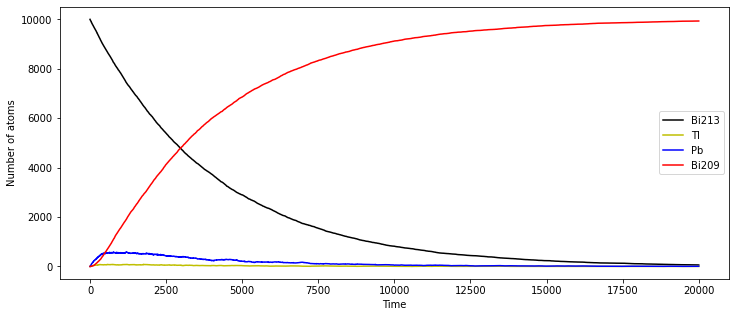

In [2]:
from random import random 
import numpy as np
import matplotlib.pyplot as plt

# initial number of atoms
NBi_213 = 10000
NTl = 0
NPb = 0             
NBi_209 = 0

# half lives in seconds
tau_Bi_213 = 46*60  
tau_Tl = 2.2*60
tau_Pb = 3.3*60


h= 1.0                 # Time step in seconds
tmax = 20000           # time we are looking at


# probabilities
p_Bi_213 = 1- 2**(-h/tau_Bi_213)
p_Tl = 1- 2**(-h/tau_Tl)     #prob that Bi decays at all
p_Pb = 1- 2**(-h/tau_Pb)

prob_Tl = 0.209      #probability that Bi will decay to Tl
prob_Pb = 0.9791     # probability that Bi will decay to Pb

# lists for plotting
tpoints = np.arange(0.0, tmax,h)
Bi_213points = []
Tlpoints= []
Pbpoints = []
Bi_209points = []



for t in tpoints: 
    Bi_213points.append(NBi_213)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi_209points.append(NBi_209)
    
    for i in range(NBi_213):
        if random() < p_Bi_213:
            NBi_213 -= 1
            if random() < prob_Tl:   # Decayed into Tl
                NTl += 1
            else:
                NPb += 1
                
    for i in range(NTl):
        if NTl != 0 and random() < p_Tl:
            NTl -= 1
            NPb += 1
        
    for i in range(NPb):
        if NPb != 0 and random() < p_Pb:
            NPb -= 1
            NBi_209 += 1
    

# Make the graph
plt.figure(figsize = (12,5))
plt.plot(tpoints, Bi_213points, 'black', label = 'Bi213' )
plt.plot(tpoints,Tlpoints, 'y', label = 'Tl') 
plt.plot(tpoints, Pbpoints, 'b', label = 'Pb')
plt.plot(tpoints, Bi_209points, 'r', label = 'Bi209')
plt.xlabel("Time")
plt.ylabel("Number of atoms") 
plt.legend()
plt.show()